## Step1：库函数导入

In [8]:
#  基础函数库
import numpy as np 

# 导入画图库
import matplotlib.pyplot as plt
import seaborn as sns

# 导入逻辑回归模型函数
from sklearn.linear_model import LogisticRegression

## Step2：训练模型

In [9]:
# Demo演示LogisticRegression分类

# 构造数据集
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

# 调用逻辑回归模型
lr_clf = LogisticRegression()

# 用逻辑回归模型拟合构造的数据集
# 其拟合方程为 y=w0+w1*x1+w2*x2
lr_clf = lr_clf.fit(x_fearures, y_label)

## Step3：模型参数查看

In [10]:
# 查看其对应模型的w
print('the weight of Logistic Regression:',lr_clf.coef_)
# 查看其对应模型的w0
print('the intercept(w0) of Logistic Regression:',lr_clf.intercept_)

the weight of Logistic Regression: [[0.73455784 0.69539712]]
the intercept(w0) of Logistic Regression: [-0.13139986]


## Step4：数据和模型可视化

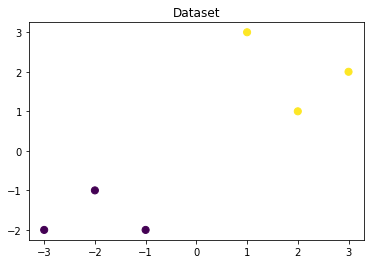

In [11]:
# 可视化构造的数据样本点
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')
plt.show()

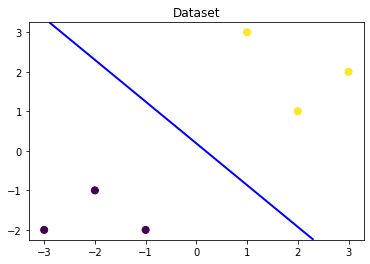

In [13]:
# 可视化决策边界
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_grid, y_grid = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))

z_proba = lr_clf.predict_proba(np.c_[x_grid.ravel(), y_grid.ravel()])
z_proba = z_proba[:, 1].reshape(x_grid.shape)
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

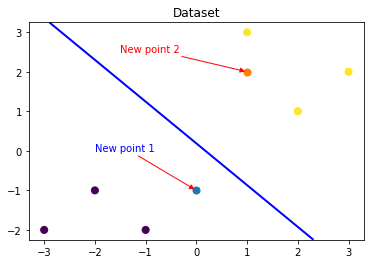

In [14]:
### 可视化预测新样本

plt.figure()
# new point 1
x_fearures_new1 = np.array([[0, -1]])
plt.scatter(x_fearures_new1[:,0],x_fearures_new1[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 1',xy=(0,-1),xytext=(-2,0),color='blue',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

# new point 2
x_fearures_new2 = np.array([[1, 2]])
plt.scatter(x_fearures_new2[:,0],x_fearures_new2[:,1], s=50, cmap='viridis')
plt.annotate(s='New point 2',xy=(1,2),xytext=(-1.5,2.5),color='red',arrowprops=dict(arrowstyle='-|>',connectionstyle='arc3',color='red'))

# 训练样本
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')

# 可视化决策边界
plt.contour(x_grid, y_grid, z_proba, [0.5], linewidths=2., colors='blue')

plt.show()

## Step5：模型预测

In [15]:
# 在训练集和测试集上分布利用训练好的模型进行预测
y_label_new1_predict=lr_clf.predict(x_fearures_new1)
y_label_new2_predict=lr_clf.predict(x_fearures_new2)
print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)
# 由于逻辑回归模型是概率预测模型（前文介绍的p = p(y=1|x,\theta)）,所有我们可以利用predict_proba函数预测其概率
y_label_new1_predict_proba=lr_clf.predict_proba(x_fearures_new1)
y_label_new2_predict_proba=lr_clf.predict_proba(x_fearures_new2)
print('The New point 1 predict Probability of each class:\n',y_label_new1_predict_proba)
print('The New point 2 predict Probability of each class:\n',y_label_new2_predict_proba)

# 可以发现训练好的回归模型将X_new1预测为了类别0（判别面左下侧），X_new2预测为了类别1（判别面右上侧）。其训练得到的逻辑回归模型的概率为0.5的判别面为上图中蓝色的线。

The New point 1 predict class:
 [0]
The New point 2 predict class:
 [1]
The New point 1 predict Probability of each class:
 [[0.69567724 0.30432276]]
The New point 2 predict Probability of each class:
 [[0.11983936 0.88016064]]
